## Observations and Insights 

In [1]:
# Three osbervable trends:
#1. Drug regimen of Capomulin & Ramicane have the most number of mice to be put under experiment, and mice are selected 
#between male & female evenly. 
#2. The Line Chart of 'Capomulin Treatment Stats for Mouse b128' indicates that the experiment of using drug Capomulin is a 
#successful experience as the tumor volume has decreased by 7mm3 by the end of the experiment. Although the tumor appears 
#to grow larger at Day 5; however, the size of the tumor decreases gradually for the rest of the experiment timepoint. 
# 3. The correlation between Mouse Weight & Average Tumor Volume is 0.84 which is a fairly strong positive relationship. 
#When the mouse weights grows, the tumor also increases. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from matplotlib.pyplot import figure
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID')

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
number_of_mice = combined_data['Mouse ID'].nunique()
number_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated('Mouse ID')]
duplicate_mice[['Mouse ID', 'Timepoint']]

,Mouse ID,Timepoint
1,k403,5
2,k403,10
3,k403,15
4,k403,20
5,k403,25
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Remove duplicate mice from the group
drop_duplicate_mice = study_results.loc[study_results.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()
drop_duplicate_mice

array(['g989'], dtype=object)

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Find duplicate mice & drop the records
drop_duplicates_mice = study_results.loc[study_results.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()

# Creat clean dataframe for clean_study_result & clean_mice
clean_study_result_data = study_results[study_results['Mouse ID'].isin(drop_duplicates_mice)==False]
clean_mice_data = mouse_metadata[mouse_metadata['Mouse ID'].isin(drop_duplicates_mice)==False]

# Combine clean_study_result & clean_mice dataframes
clean_data_merged = pd.merge(clean_study_result_data, clean_mice_data, how='inner', on='Mouse ID')
clean_data_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


In [8]:
# Checking the number of mice in the clean DataFrame.
number_of_mice2 = clean_data_merged['Mouse ID'].nunique()
number_of_mice2

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regime
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Group by drug regimen data
grouped_drug_regimen = clean_data_merged.groupby('Drug Regimen')
grouped_drug_regimen.head()


# Calculate mean of tumor volume by using groupby & summary statistical method
statistics_mean = round(grouped_drug_regimen.mean()["Tumor Volume (mm3)"],2)
statistics_mean

# Calculate median of tumor volume by using groupby & summary statistical method
statistics_median = round(grouped_drug_regimen.median()["Tumor Volume (mm3)"],2)
statistics_median

# Calculate variance of tumor volume by using groupby & summary statistical method
statistics_var = round(grouped_drug_regimen.var()["Tumor Volume (mm3)"],2)
statistics_var

# Calculate standard deviation of tumor volume by using groupby & summary statistical method
statistics_std = round(grouped_drug_regimen.std()["Tumor Volume (mm3)"],2)
statistics_std

# Calculate SEM of tumor volume by using groupby & summary statistical method
statistics_SEM = round(grouped_drug_regimen.sem()["Tumor Volume (mm3)"],2)
statistics_SEM

# Assemble the results into a single summary dataframe
statistics_summary_1 = pd.DataFrame({"Mean": statistics_mean,
                                    "Median": statistics_median,
                                    "Var": statistics_var,
                                    "STD":statistics_std,
                                    "SEM":statistics_SEM})
                                   
statistics_summary_1

,Mean,Median,Var,STD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

# Group merged df by Drug Regimen
grouped_drug_regimen = combined_data.groupby('Drug Regimen')
grouped_drug_regimen.head()

# Calculate mean, median, var, std, SEM with aggregation method
statistics_summary_2 = round(grouped_drug_regimen.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"],2)

# Rename columns & display final result
statistics_summary_2 = statistics_summary_2.rename(columns = {'mean': 'Mean', 
                                              'median': 'Median', 
                                              'var': 'Var',
                                              'std':'STD',
                                              'sem': 'SEM'})
statistics_summary_2


,Mean,Median,Var,STD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

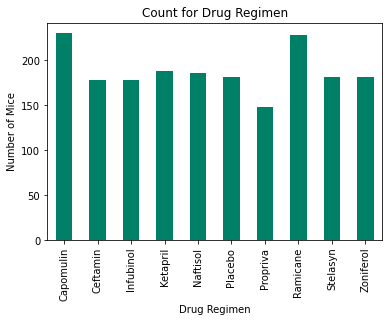

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Create a group based on the values of drug regimen
grouped_drug_regimen = clean_data_merged.groupby('Drug Regimen')
grouped_drug_regimen.head()

# Count the number for each drug 
count_number_of_mice = grouped_drug_regimen['Drug Regimen'].count()
count_number_of_mice

# Create a bar chart based off the data of count for each drug
count_chart = count_number_of_mice.plot(kind='bar', colormap='summer')

# Set the xlabel and ylabel using class methods
count_chart.set_title("Count for Drug Regimen")
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Mice")

# Save figure & Display completed bar chart
plt.savefig("../Images/bar_chart_pandas.png")
plt.show()

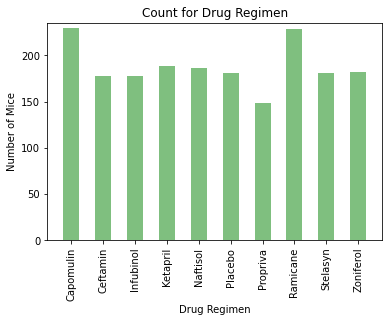

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

# Create a group based on the values of drug regimen
grouped_drug_regimen = clean_data_merged.groupby('Drug Regimen')
grouped_drug_regimen.head()

# Count the number for each drug 
count_number_of_mice = grouped_drug_regimen['Drug Regimen'].count()
count_number_of_mice

# Set x_axis range & tick locations
x_axis = np.arange(0, len(count_number_of_mice))
tick_locations = [value for value in x_axis]
    
# Rename xlabel & ylabel
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

# Set up xlim range & ylim range
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0,max(count_number_of_mice) + 5)

# Set up display color, size, width, and x_axis label for the bar chart
plt.title("Count for Drug Regimen")
plt.bar(x_axis, count_number_of_mice, facecolor="green", alpha=0.5, align="center", width=0.5)
plt.xticks(tick_locations, list(count_number_of_mice.index), rotation="vertical")

# Save figure & Display completed bar chart
plt.savefig("../Images/bar_chart_pyplot.png")
plt.show()

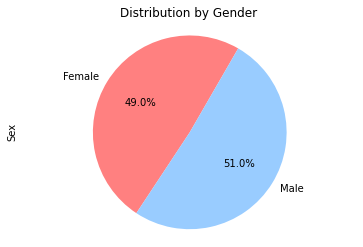

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Group data based on mouse ID & gender
gender_grouped = clean_data_merged.groupby('Sex')
gender_grouped.head()

# Create a dataframe to count mice by gender
total_by_gender = gender_grouped['Sex'].count()
total_by_gender

# Create a pie chart based on gender & formatting the chart
gender_pie = total_by_gender.plot(kind="pie", y='Sex', 
                                  colors = ['#FF8080', '#99CCFF'], title="Distribution by Gender",
                                  autopct='%1.1f%%', startangle=60)

# Set axis to equal
plt.axis("equal")

# Save figure to the local folder & display final result
plt.savefig("../Images/PandasPieChart_Pandas.png")
plt.show()


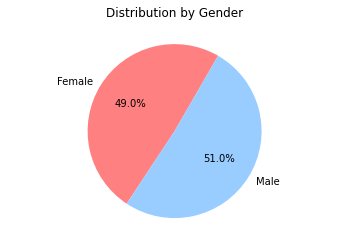

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Group data based on mouse ID & gender
gender_grouped = clean_data_merged.groupby('Sex')
gender_grouped.head()

# Create a dataframe to count mice by gender
total_by_gender = gender_grouped['Sex'].count()
total_by_gender

# Create label for pie chart
gender = list(total_by_gender.index.values)

#Create Pie Chart title 
plt.title("Distribution by Gender")

# Set axis to equal 
plt.axis("equal")

# Create a Pie Chart & formatting the chart
plt.pie(total_by_gender, labels=gender, colors=['#FF8080', '#99CCFF'], autopct='%1.1f%%', startangle=60)

# Save figure to local folder & display final result
plt.savefig("../Images/PyplotPieChart_PyPlot.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = clean_mice_data[clean_mice_data['Drug Regimen'].isin(four_drug_regimens)]
final_tumor_volume

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
235,x822,Ceftamin,Male,3,29
237,y163,Infubinol,Female,17,27
241,y769,Ceftamin,Female,6,27
242,y865,Ceftamin,Male,23,26


In [16]:
# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_data_merged.groupby(['Mouse ID'])['Timepoint'].max()
greatest_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_volume_at_last_timepoint = pd.merge(greatest_timepoint, clean_data_merged, how='inner', on=['Mouse ID', 'Timepoint'])
tumor_volume_at_last_timepoint2 = tumor_volume_at_last_timepoint[["Mouse ID" , "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]
tumor_volume_at_last_timepoint2


,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a262,45,70.717621,Placebo
3,a275,45,62.999356,Ceftamin
4,a366,30,63.440686,Stelasyn
...,...,...,...,...
243,z435,10,48.710661,Propriva
244,z578,45,30.638696,Ramicane
245,z581,45,62.754451,Infubinol
246,z795,45,65.741070,Naftisol


In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Create a list of four drugs
four_drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a dataframe for all the four drugs
final_tumor_volume_four_drug = tumor_volume_at_last_timepoint2[tumor_volume_at_last_timepoint2['Drug Regimen'].
                                                               isin(four_drug_regimens)]
final_tumor_volume_four_drug

# Create dataframes for the drug of Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_drug_data = final_tumor_volume_four_drug.loc[final_tumor_volume_four_drug['Drug Regimen'] == 'Capomulin']
ramicane_drug_data = final_tumor_volume_four_drug.loc[final_tumor_volume_four_drug['Drug Regimen'] == 'Ramicane']
infubinol_drug_data = final_tumor_volume_four_drug.loc[final_tumor_volume_four_drug['Drug Regimen'] == 'Infubinol']
ceftamin_drug_data = final_tumor_volume_four_drug.loc[final_tumor_volume_four_drug['Drug Regimen'] == 'Ceftamin']

# Calculate the IQR and quantitatively determine if there are any potential outliers for Capumulin
quartiles_capomulin = capomulin_drug_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_capomulin = round(quartiles_capomulin[.25],2)
upperq_capomulin = round(quartiles_capomulin[.75],2)
iqr_capomulin = round((upperq_capomulin-lowerq_capomulin),2)
lower_bound_capomulin = round(lowerq_capomulin - (1.5*iqr_capomulin),2)
upper_bound_capomulin = round(upperq_capomulin + (1.5*iqr_capomulin),2)

# Calculate the IQR and quantitatively determine if there are any potential outliers for Ramicane
quartiles_ramicane = ramicane_drug_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_ramicane = round(quartiles_ramicane[.25],2)
upperq_ramicane = round(quartiles_ramicane[.75],2)
iqr_ramicane = round((upperq_ramicane-lowerq_ramicane),2)
lower_bound_ramicane = round(lowerq_ramicane - (1.5*iqr_ramicane),2)
upper_bound_ramicane = round(upperq_ramicane + (1.5*iqr_ramicane),2)

# Calculate the IQR and quantitatively determine if there are any potential outliers for Infubinol
quartiles_infubinol = infubinol_drug_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_infubinol = round(quartiles_infubinol[.25],2)
upperq_infubinol = round(quartiles_infubinol[.75],2)
iqr_infubinol = round((upperq_infubinol-lowerq_infubinol),2)
lower_bound_infubinol = round(lowerq_infubinol - (1.5*iqr_infubinol),2)
upper_bound_infubinol = round(upperq_infubinol + (1.5*iqr_infubinol),2)

# Calculate the IQR and quantitatively determine if there are any potential outliers for Ceftamin
quartiles_ceftamin = ceftamin_drug_data['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq_ceftamin = round(quartiles_ceftamin[.25],2)
upperq_ceftamin = round(quartiles_ceftamin[.75],2)
iqr_ceftamin = round((upperq_ceftamin-lowerq_ceftamin),2)
lower_bound_ceftamin = round(lowerq_ceftamin - (1.5*iqr_ceftamin),2)
upper_bound_ceftamin = round(upperq_ceftamin + (1.5*iqr_ceftamin),2)

# Print calcuation results for all four drugs:

print("The IRQ data for Capomulin is:")
print(f"The lower quartile of Capomulin is: {lowerq_capomulin}")
print(f"The upper qartile of Capomulin is: {upperq_capomulin}")
print(f"The interquartile range of Capumulin is: {iqr_capomulin}")
print(f"The median of Capomulin is: {round(quartiles_capomulin[0.5],2)}")
print(f"Value below {lower_bound_capomulin} could be outliers.")
print(f"Value above {upper_bound_capomulin} could be outliers.")
print("-------------------------------------------")
print("The IRQ data for Ramicane is:")
print(f"The lower quartile of Ramicane is: {lowerq_ramicane}")
print(f"The upper qartile of Ramicane is: {upperq_ramicane}")
print(f"The interquartile range of Ramicane is: {iqr_ramicane}")
print(f"The median of Ramicane is: {round(quartiles_ramicane[0.5],2)}")
print(f"Value below {lower_bound_ramicane} could be outliers.")
print(f"Value above {upper_bound_ramicane} could be outliers.")
print("-------------------------------------------")
print("The IRQ data for Infubinol is:")
print(f"The lower quartile of Infubinol is: {lowerq_infubinol}")
print(f"The upper qartile of Infubinol is: {upperq_infubinol}")
print(f"The interquartile range of Infubionol is: {iqr_infubinol}")
print(f"The median of Infubionol is: {round(quartiles_infubinol[0.5],2)}")
print(f"Value below {lower_bound_infubinol} could be outliers.")
print(f"Value above {upper_bound_infubinol} could be outliers.")
print("-------------------------------------------")
print("The IRQ data for Ceftamin is:")
print(f"The lower quartile of Ceftamin is: {lowerq_ceftamin}")
print(f"The upper qartile of Ceftamin is: {upperq_ceftamin}")
print(f"The interquartile range of Ceftamin is: {iqr_ceftamin}")
print(f"The median of Ceftamin is: {round(quartiles_ceftamin[0.5],2)}")
print(f"Value below {lower_bound_ceftamin} could be outliers.")
print(f"Value above {upper_bound_ceftamin} could be outliers.")

The IRQ data for Capomulin is:
The lower quartile of Capomulin is: 32.38
The upper qartile of Capomulin is: 40.16
The interquartile range of Capumulin is: 7.78
The median of Capomulin is: 38.13
Value below 20.71 could be outliers.
Value above 51.83 could be outliers.
-------------------------------------------
The IRQ data for Ramicane is:
The lower quartile of Ramicane is: 31.56
The upper qartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The median of Ramicane is: 36.56
Value below 17.91 could be outliers.
Value above 54.31 could be outliers.
-------------------------------------------
The IRQ data for Infubinol is:
The lower quartile of Infubinol is: 54.05
The upper qartile of Infubinol is: 65.53
The interquartile range of Infubionol is: 11.48
The median of Infubionol is: 60.17
Value below 36.83 could be outliers.
Value above 82.75 could be outliers.
-------------------------------------------
The IRQ data for Ceftamin is:
The lower quartile of Ceftamin is: 48

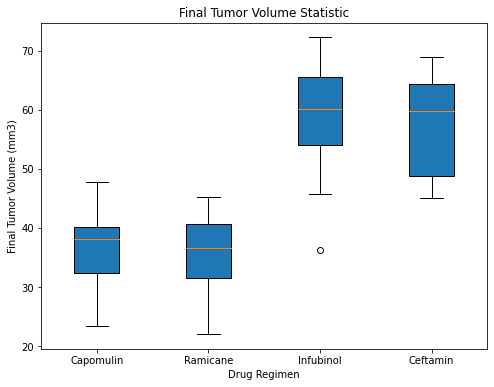

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_for_box_plot = [capomulin_drug_data["Tumor Volume (mm3)"], ramicane_drug_data["Tumor Volume (mm3)"], 
                    infubinol_drug_data["Tumor Volume (mm3)"], ceftamin_drug_data["Tumor Volume (mm3)"]]
drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Set up boxplot figure size
fig1, ax1 = plt.subplots(figsize=(8,6))

# Set up title, xlabel, ylabel names
ax1.set_title('Final Tumor Volume Statistic')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')

# Set up data source & label names for boxplot
ax1.boxplot(data_for_box_plot, labels=drug_regimen, widths=0.4, patch_artist=True)

# Save figure & diplay final result
plt.savefig("../Images/box_plot.png")
plt.show()


## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

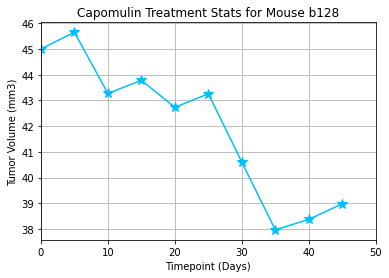

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Select data for mouse b128 which has been put under experiment of taking drug regimen of Capomulin for treatment
mouse_b128 = clean_data_merged.loc[clean_data_merged['Mouse ID'] == "b128"]
mouse_b128

# Collect data for mouse b128 tumor volume
b128_tumor_volume = mouse_b128["Tumor Volume (mm3)"]
b128_tumor_volume

# Collect data for mouse b128 timepoint
b128_time_point = mouse_b128["Timepoint"]
b128_time_point

# Create line plot with data sources & plot formating
plt.plot(b128_time_point, b128_tumor_volume, marker="*", markersize=10, color="deepskyblue")

# Set up plot title, xlable, and ylabel
plt.title("Capomulin Treatment Stats for Mouse b128")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Set up plot xlim
plt.xlim(0, 50)

# Add grid onto plot background
plt.grid()

# Save config & display final result
plt.savefig("../Images/line_plot.png")
plt.show

In [20]:
# Create data for Capomulin
capomulin_data = clean_data_merged.loc[clean_data_merged['Drug Regimen'] == "Capomulin"]
capomulin_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1875,m601,25,33.118756,1,Capomulin,Male,22,17
1876,m601,30,31.758275,1,Capomulin,Male,22,17
1877,m601,35,30.834357,1,Capomulin,Male,22,17
1878,m601,40,31.378045,1,Capomulin,Male,22,17


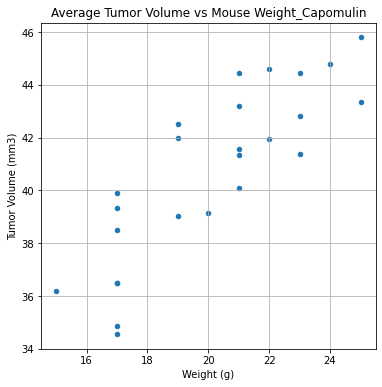

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Collect all the data for drug regimen of Capolumin
capomulin_data = clean_data_merged.loc[clean_data_merged['Drug Regimen'] == "Capomulin"]
capomulin_data

# Collect data of average tumor volume vs mouse weight
avg_tumor_vol_weight = capomulin_data.groupby(['Mouse ID']).mean()

# Create a scatter plot with average tumor volume data & weight data & formatting plot
avg_tumor_vol_weight.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(6,6), 
                          title="Average Tumor Volume vs Mouse Weight_Capomulin")

# Save plot figure & display final result
plt.savefig("../Images/scatter_plot.png")
plt.show()

In [22]:
## Correlation and Regression
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Collect data for mouse weight & average tumor volume 
weight = avg_tumor_vol_weight.iloc[:,4]
avg_tumor = avg_tumor_vol_weight.iloc[:,1]

# Calculate correlation between mouse weight & average tumor volume
correlation = st.pearsonr(weight, avg_tumor)
print(f"The correlaton between Mouse weight & Average Tumor Volume is {round(correlation[0],2)}")

The correlaton between Mouse weight & Average Tumor Volume is 0.84


In [23]:
# Collect data for mouse weight & average tumor volume 
weight = avg_tumor_vol_weight.iloc[:,4]
avg_tumor = avg_tumor_vol_weight.iloc[:,1]

# Calculate Linear Regression Model
model=st.linregress(weight, avg_tumor)
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [24]:
# Calculate equation of regresiion

# Set up x_values & y_values
x_values = weight
y_values = avg_tumor

# Calcuate equation of Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 0.95x + 21.55'

The r-squared is: 0.7089


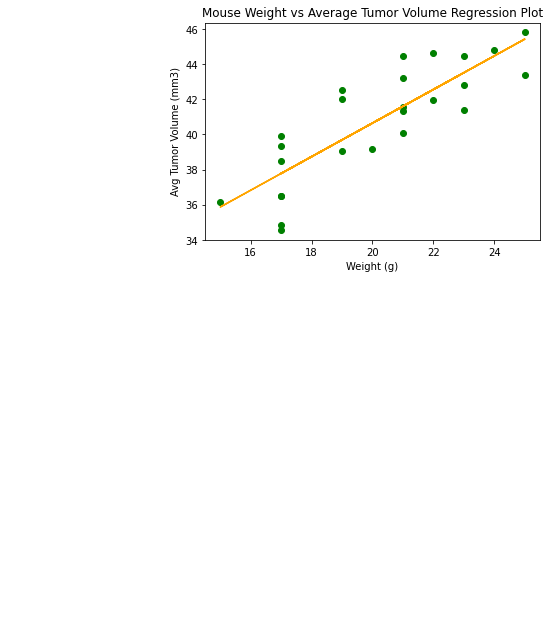

In [25]:
# Create a scatter plot for Regression

# Create scatter plot for Regression & formatting plot
plt.scatter(x_values, y_values, color="green")
plt.plot(x_values, regress_values, "orange")
plt.annotate(line_eq,(8,12),fontsize=15,color="red")

# Set up figure title, xlabel, y-lable and print message of r-squared result
plt.title('Mouse Weight vs Average Tumor Volume Regression Plot')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
print(f"The r-squared is: {round((rvalue**2),4)}")

# Save Regression Scatter figure & display final result
plt.savefig("../Images/Regression_plot.png")
plt.show()
